In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

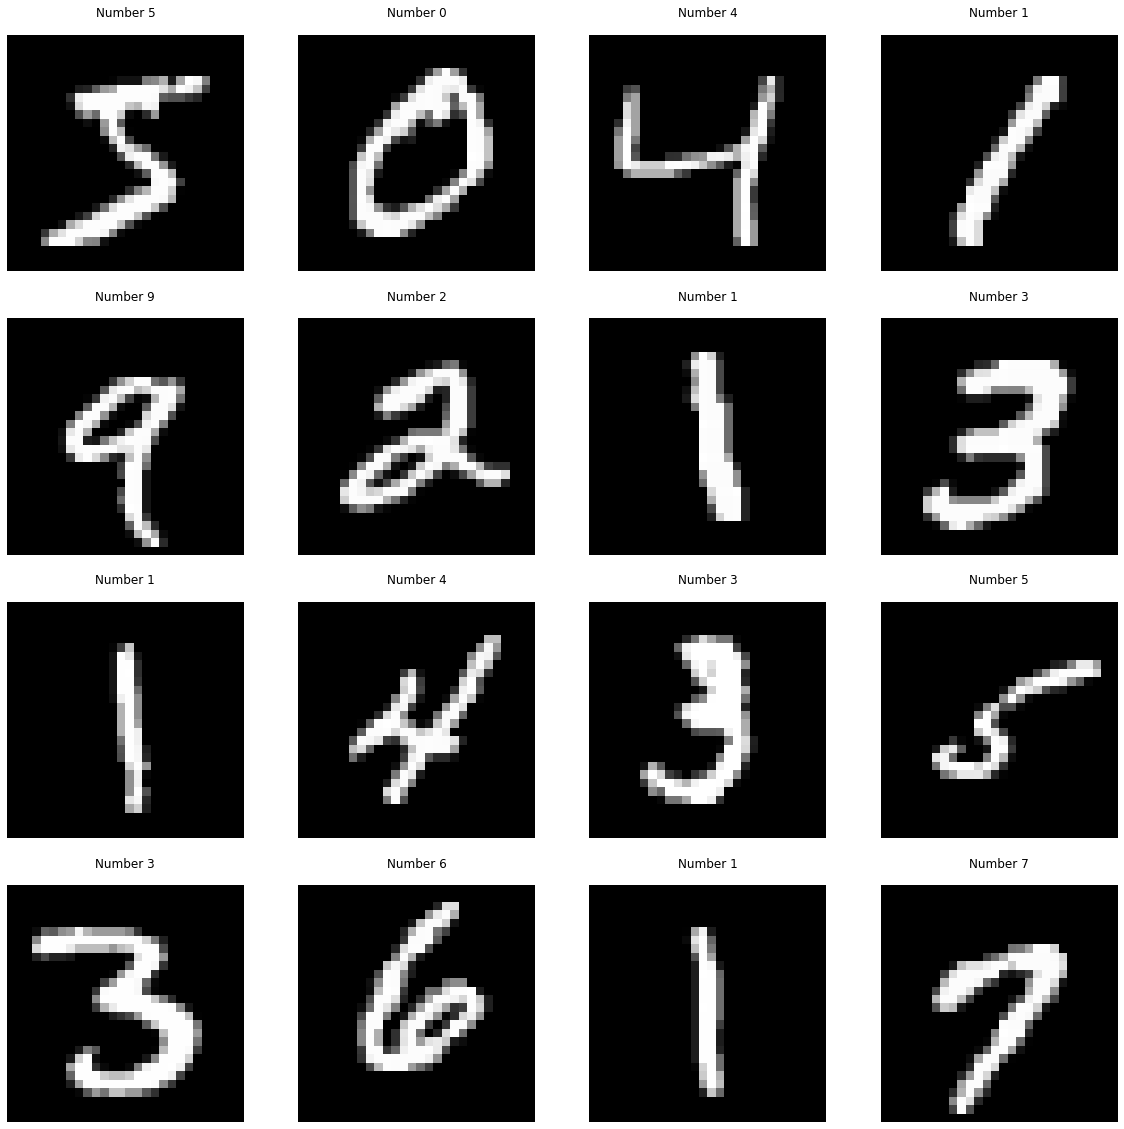

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i , ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28,1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2047 - accuracy: 0.9387
Epoch 2/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0857 - accuracy: 0.9735


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0643 - accuracy: 0.9786


[0.06427575647830963, 0.978600025177002]

In [9]:
pred = model.predict(x_test)

In [10]:
pred

array([[1.4866539e-06, 4.4138989e-07, 2.5047470e-04, ..., 9.9971658e-01,
        2.7104772e-07, 4.7934245e-06],
       [1.7107850e-04, 2.9236596e-04, 9.9952173e-01, ..., 1.8580701e-10,
        3.9757597e-06, 8.3450530e-10],
       [4.5024942e-07, 9.9992108e-01, 6.3052771e-06, ..., 3.1571304e-05,
        1.0080369e-05, 8.3473327e-07],
       ...,
       [2.8084533e-11, 6.1918826e-08, 4.4963461e-10, ..., 5.0086351e-07,
        1.5927895e-05, 1.2693480e-04],
       [3.9020708e-07, 1.7551215e-09, 8.9068600e-11, ..., 1.4160776e-09,
        9.2826725e-05, 1.4391756e-10],
       [1.8068135e-07, 1.9753529e-10, 1.7003383e-07, ..., 1.2728695e-12,
        3.1910363e-07, 5.1220561e-09]], dtype=float32)

In [19]:
import numpy as np
print(np.argmax(pred[2]))

1


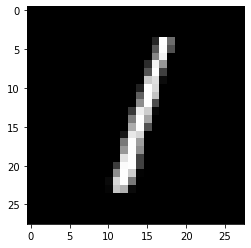

In [20]:
plt.imshow(np.squeeze(x_test[2]))
plt.show()